Advanced Data viz operation, including heatmap, diverging bars, dumbbel plot, funnel, waffle charts, time series and many others. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (14, 5),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)

# Correlogram and Heatmap

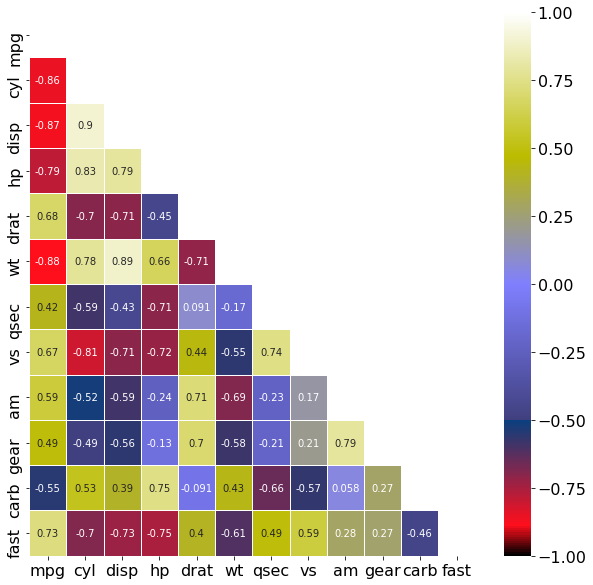

In [3]:
cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
fig = plt.figure(figsize=(10,10))

mask = np.zeros_like(cars.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=cars.corr(), 
            xticklabels=cars.corr().columns, 
            yticklabels=cars.corr().columns, 
            cmap='gist_stern', 
            center=0, 
            annot=True,
            cbar_kws={"orientation": "vertical"},  # vertical or horizontal
            vmin=-1, vmax= 1,
            linewidths=.5, # space between each square
            mask = mask) # diagonal matrix!

plt.show()

#  Diverging bars, remove legend sns

In [4]:
def show_values_on_bars(axs, h_v="v", space_x=0.12,space_y=0.1, fontdict=None):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2 + space_x
                _y = p.get_y() + p.get_height() + (space_y)
                if not np.isnan(p.get_width()):
                    value = round(p.get_height(),2)
                    if fontdict: ax.text(_x, _y, value, ha="left", fontdict=fontdict)
                    else: ax.text(_x, _y, value, ha="left")
        elif h_v == "h":
            for p in ax.patches:
                try:
                    _x = p.get_x() + p.get_width() + space_x
                    _y = p.get_y() + p.get_height() + space_y
                    if not np.isnan(p.get_width()):
                        value = round(p.get_width(),2)
                        if value < 0: _x-=0.27
                        if fontdict: ax.text(_x, _y, value, ha="left", fontdict=fontdict)
                        else: ax.text(_x, _y, value, ha="left")
                except: print(f'Error while preparing {str(p)}')
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

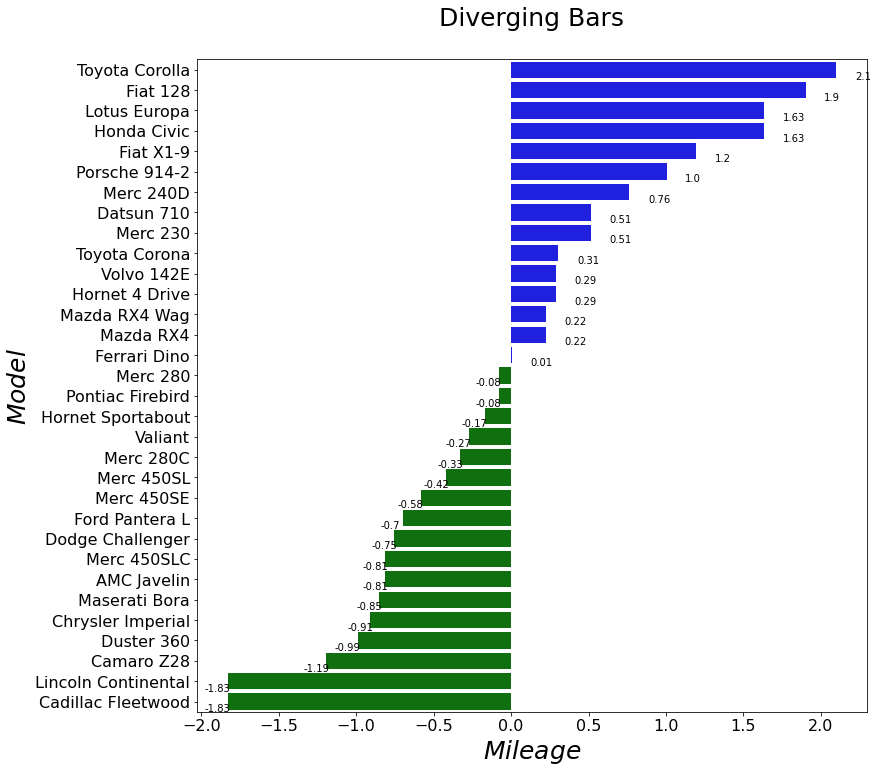

In [5]:
cars = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
plt.figure(figsize=(12,12))
cars = cars.fillna(0)

# create column with distance in standard deviation
xs  = cars['mpg']
cars['dist'] = (xs - xs.mean())/ xs.std() # (values - mean) / sd
cars.sort_values(by='dist', inplace=True, ascending=False)

# create colours
def cat(x):
    if x < 0: return 'green'
    else: return 'blue'
        
cars['col'] = cars['dist'].apply(cat)


g1 = sns.barplot(data = cars, y = "cars", x = "dist", 
                 palette= cars.col)

g1.set_xlabel('$Mileage$', fontsize=25)
g1.set_ylabel('$Model$', fontsize=25)
show_values_on_bars(g1, 'h')

plt.title('Diverging Bars\n', fontsize=25)
plt.show()

## Diverging dot-plot

In [6]:
def text_scatter(data, variable, orient='v', space_orient=0.02, space_support=.0, space_orient_n=-0.05, fontdict=None):
    copy = data.copy()
    copy.sort_values(by= variable, ascending=True)
    copy.reset_index(inplace=True)
    for i in range(len(copy)):
        if orient == 'v': plt.text( x= i + space_support ,
                                  y= copy[variable][i] + space_orient, 
                                  s = round(copy[variable][i],1),
                                  fontdict = fontdict)
            
        else: plt.text(y= i + space_support ,
                       x= copy[variable][i] + space_orient if copy[variable][i]> 0 else copy[variable][i] + space_orient_n, 
                       s = round(copy[variable][i],1),
                       fontdict = fontdict)

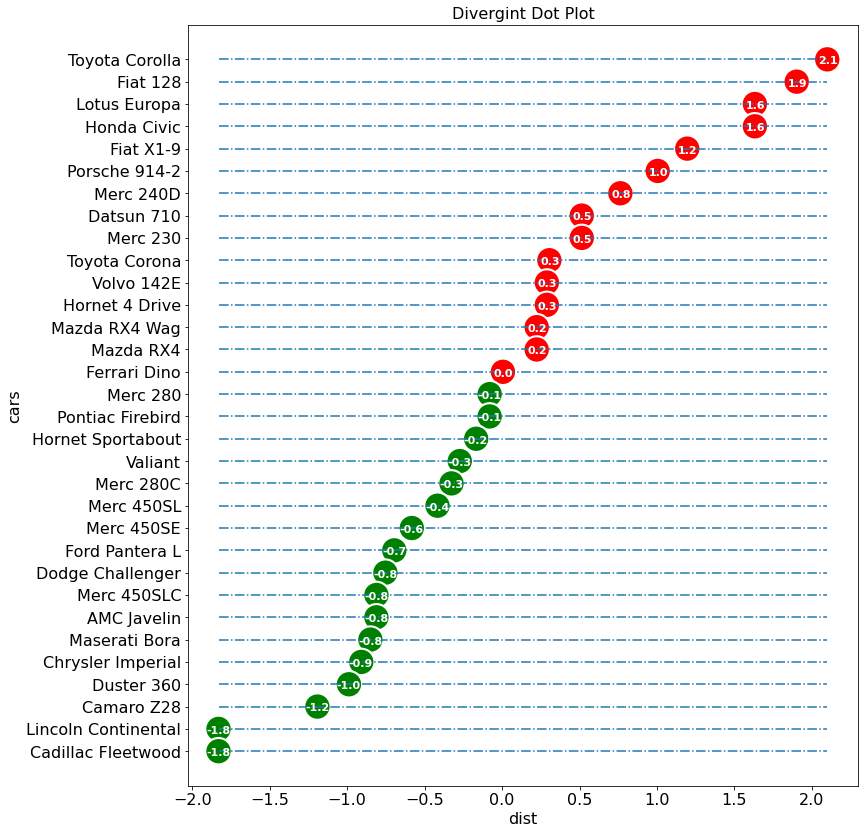

In [7]:
plt.figure(figsize=(12,14))

cars.reset_index(drop=True, inplace=True) # for the iteration!

g1 = sns.scatterplot(data = cars, y = "cars", x = "dist", 
                     hue= cars.col,
                     palette = {'blue':'red', 'green':'green'},
                     s=700).legend_.remove()


text_scatter(data=cars, variable='dist', orient='h', space_support= 0.2, space_orient= -0.06, 
             space_orient_n=-0.08, fontdict=dict(color='white',size=11, weight='bold'))

plt.hlines(y = cars.cars, xmin=cars.dist.min(), xmax=cars.dist.max(), linestyles='dashdot')

plt.title("Divergint Dot Plot")
plt.show()

## Lollipop with HLINES

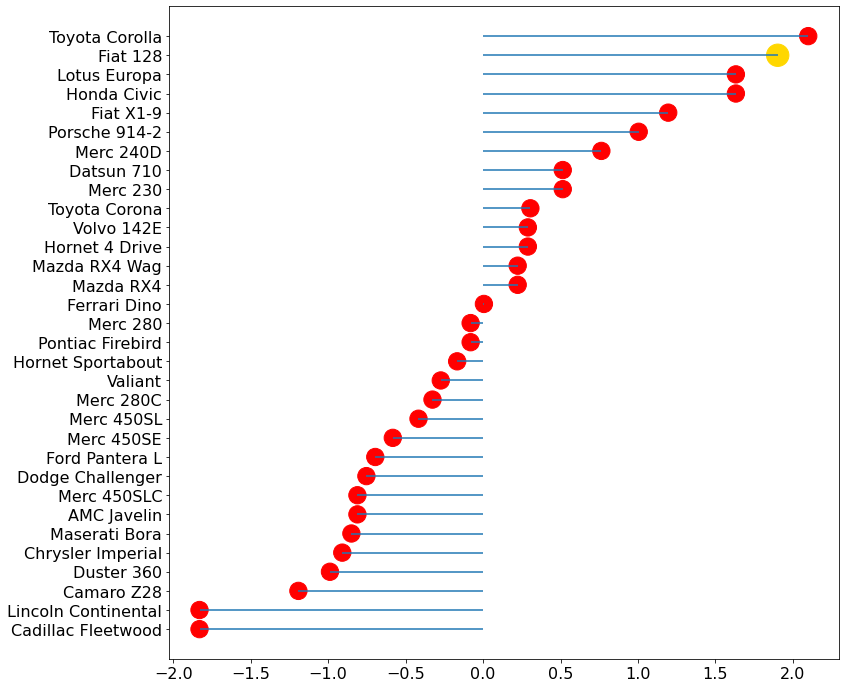

In [8]:
plt.figure(figsize=(12,12))
cars.sort_values(by='dist', inplace=True, ascending=True)

higligted_point = [300 if i != 'Fiat 128' else 500 for i in cars.cars]
colors = ['red' if i != 'Fiat 128' else 'gold' for i in cars.cars]

plt.scatter(data = cars, y = "cars", x = "dist", 
                 color=colors,
                 s=higligted_point)

plt.hlines(y = cars.cars, 
           xmin=0, 
           xmax = cars.dist) #horizontal lines, not available in sns.

plt.show()

## Dumbbel Plot

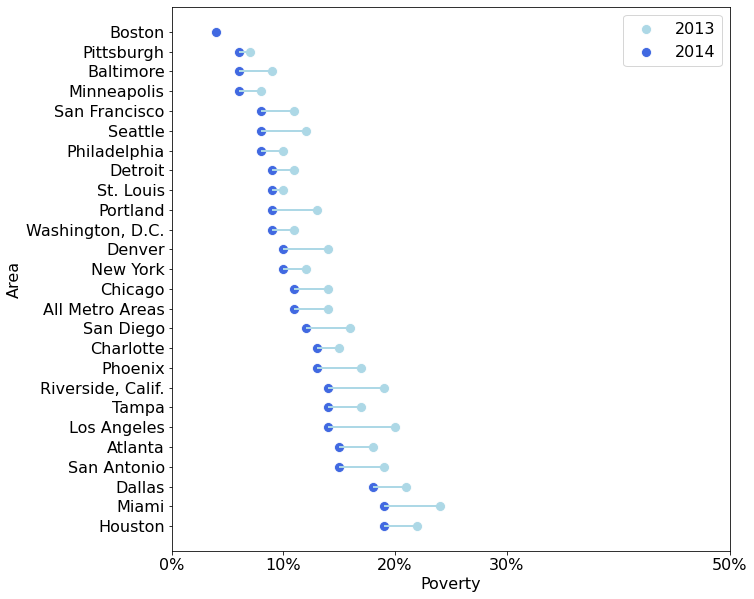

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")
df.sort_values(by= 'pct_2014', inplace=True)
fig = plt.figure(figsize=(10,10))

g1= sns.scatterplot(data=df, y = df.Area, x = df.pct_2013, s = 100, color='lightblue', label='2013')
g1 = sns.scatterplot(data=df, y = df.Area, x = df.pct_2014, s = 100, color='royalblue', label='2014')


for row in range(len(df)):
    plt.hlines(y = df.Area, xmin = df.pct_2013, xmax=df.pct_2014, color='lightblue')

g1.set_xticks([0, 0.1,0.2,0.3,0.5])
g1.set_xticklabels(['0%', '10%', "20%", "30%", '50%'])

g1.set_xlabel("Poverty")
plt.show()

## Funnel

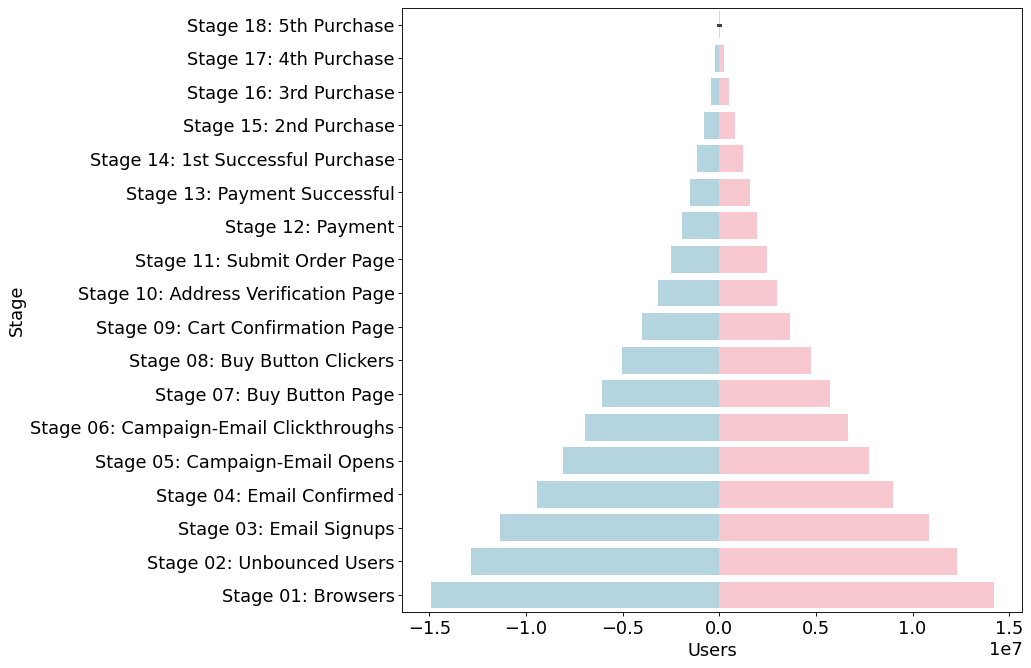

In [10]:
funnel = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")
plt.figure(figsize=(10,10), dpi= 80)
g1 = sns.barplot(data= funnel[funnel.Gender == 'Male'], y= 'Stage', x='Users', color='lightblue')
g2 = sns.barplot(data= funnel[funnel.Gender == 'Female'], y= 'Stage', x='Users', color='pink')

g1.invert_yaxis()
plt.show()

# Waffle Chart

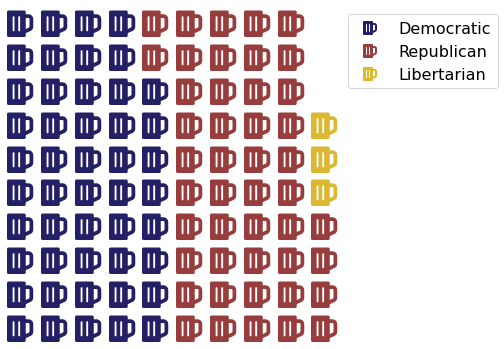

In [11]:
from pywaffle import Waffle

data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    colors=("#232066", "#983D3D", "#DCB732"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='beer', icon_size=30,  # https://fontawesome.com/v5.15/icons?d=gallery&p=2&m=free
    icon_legend=True
)

c:\users\dell\venv\jupyter\lib\site-packages\pywaffle\waffle.py:394: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  self.ax = self.add_subplot(loc, aspect="equal")


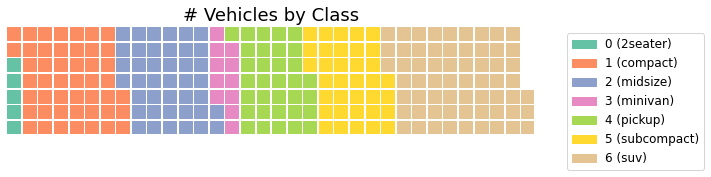

In [12]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df.groupby('class').size().reset_index(name='counts')

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    figsize=(10, 4)
)

# Tree Map

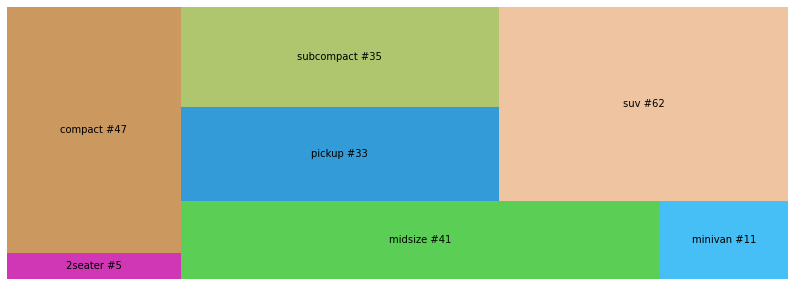

In [13]:
import squarify
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw.groupby('class').size()  # now class is the index of the new dataframe / series
df = df.reset_index(name='counts')                # must assign again

labels = []
for row in range(len(df)):  labels.append(str(df.loc[row, ['class']].values[0]) + " #" + str(df.loc[row, ['counts']].values[0]))
sizes = df.counts.tolist()

[plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))] # fancy color prof

np.random.seed(10)
colors = np.random.rand(7,3) # random tensor rgb 7x3

squarify.plot(sizes=sizes, 
              label=labels, 
              color=colors, 
              alpha=0.8)

plt.axis('off')
plt.show()

# Calendar HeatMap

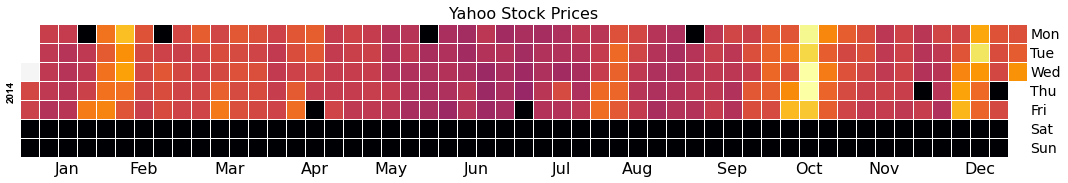

In [14]:
import calmap
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
calmap.calendarplot(df.loc['2014','VIX.Close'], 
                    fig_kws={'figsize': (15,12)}, 
                    yearlabel_kws={'color':'black', 'fontsize':10}, 
                    subplot_kws={'title':'Yahoo Stock Prices'},
                    cmap='inferno') 

plt.yticks(fontsize=14)
plt.show()

# Time Series 

In [15]:
def peak_detection(data):
    data = data.values
    doublediff = np.diff(np.sign(np.diff(data)))
    peak_locations = np.where(doublediff == -2)[0] + 1
    doublediff2 = np.diff(np.sign(np.diff(-1*data)))
    trough_locations = np.where(doublediff2 == -2)[0] + 1
    return (peak_locations, trough_locations )

def peak_annotation(x, y, peak, low):
    for t, p in zip(low[1::2], peak[::2]):
        plt.text(x[p], y[p]+15, x[p].strftime("%m-%d"), horizontalalignment='center', color='darkgreen')
        plt.text(x[t], y[t]-35,x[t].strftime("%m-%d"), horizontalalignment='center', color='darkred')

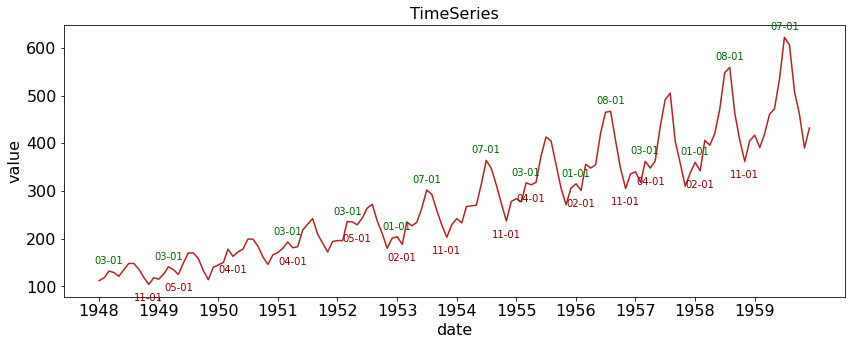

In [16]:
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv', parse_dates=['date'])
g1 = sns.lineplot(data=df, x='date', y='value', color='firebrick') 
# if in the data frame are casted as time series seaborn will take care of that!

# custom ticks!
mths = pd.date_range('1948-01-01', periods=12, freq='Y')

g1.set_xticks(mths.strftime('%Y-%m-%d'))
g1.set(xticklabels=mths.strftime('%Y'))

peak, low = peak_detection(data=df.value)
peak_annotation (x= df.date, y = df.value, peak=peak, low=low )

plt.title('TimeSeries')
plt.show()

## Multiple Time Series with two y Axes

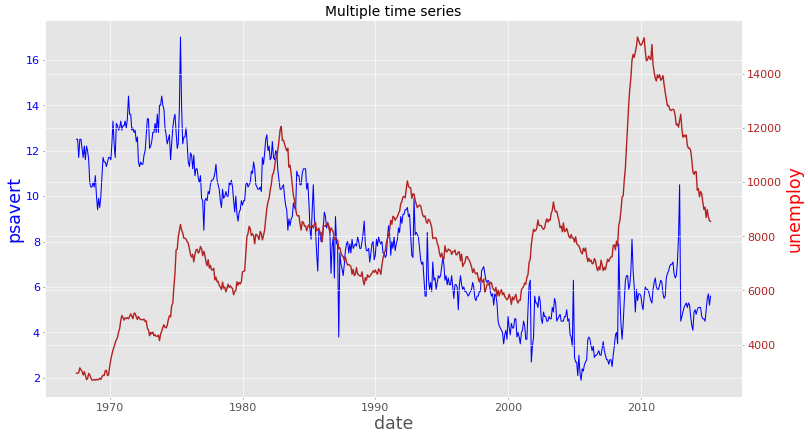

In [17]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date'])

plt.figure(figsize=(18,10), dpi=50)

plt.style.use('ggplot')
g1 = sns.lineplot(data=df, x='date', y = 'psavert', color='blue', linewidth = 1.5)
g1.set_xlabel('date', fontdict=dict(size=25))
g1.set_ylabel('psavert', fontdict=dict(size=25, color='blue'))


# plt.twinx() <-
g2 = plt.twinx()
sns.lineplot(ax=g2, data=df, x='date', y='unemploy', color='firebrick',linewidth =2)
g2.set_ylabel('unemploy', fontdict=dict(size=25, color='red'))

# color ticks and axes:
[t.set_color('blue') for t in g1.yaxis.get_ticklabels()]
[t.set_color('firebrick') for t in g2.yaxis.get_ticklabels()]

plt.title('Multiple time series', fontdict=dict(size=20))
plt.show()

# Stacked Area chart

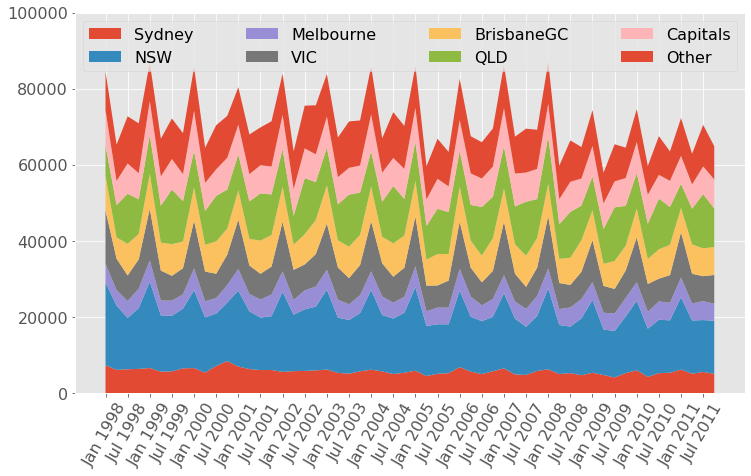

In [18]:
from matplotlib.dates import DateFormatter

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/nightvisitors.csv')
plt.figure(figsize=(12,7))

g1 = plt.stackplot(df.yearmon,
              df.iloc[:,1], df.iloc[:,2], df.iloc[:,3], df.iloc[:,4], 
              df.iloc[:,5], df.iloc[:,6], df.iloc[:,7], df.iloc[:,8], labels= df.columns.values[1:])


plt.xticks(df.yearmon[::2], df.yearmon[::2],rotation=60)
plt.ylim(0,100000)
plt.legend( loc='best',  mode = "expand",ncol=int(len(df.columns)/2))
plt.show()

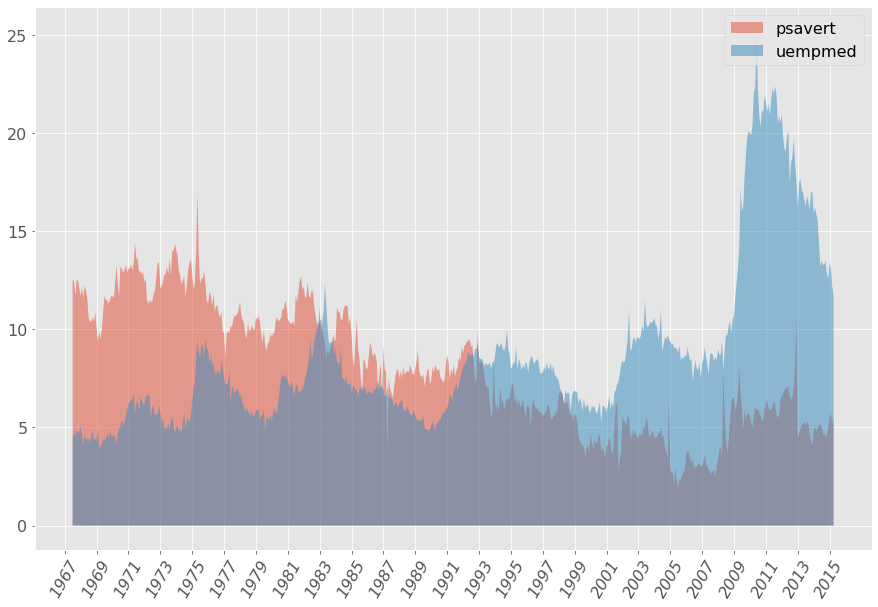

In [19]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/economics.csv", parse_dates=['date'])
plt.figure(figsize=(15,10))

plt.fill_between(x = df.date, y1 = df.psavert, y2 = 0,
                 label = 'psavert',
                 alpha=0.5)                 #must set alpha lower than 1 or they will overlap

plt.fill_between(x = df.date, y1 = df.uempmed, y2 = 0,
                 label = 'uempmed',
                 alpha=0.5)

years= df.date.dt.strftime("%Y").unique()[::2]
plt.xticks(years,years, rotation = 60, style='italic')
plt.legend()
plt.show()